<a href="https://colab.research.google.com/github/AgainstEntropy/ECE-GY-6143-ML/blob/main/1_exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory data analysis
=========================

*Fraida Fund*

In this notebook
----------------

In this notebook:

-   We practice using `pandas` to read in and manipulate a data set. (We
    won’t have a separate tutorial on `pandas` - we will learn basic
    `pandas` techniques as we need them.)
-   We learn a basic “recipe” for exploratory data analysis and apply it
    to an example

Introduction
------------

The first step in applying machine learning to a real problem is
*finding* or *creating* an appropriate data set with which to train your
model.

### What makes data “good”?

What makes a good data set?

-   **Size**: the more *samples* are in the data set, the more examples
    your machine learning model will be able to learn from, and the
    better it will do. Often, a simple machine learning model trained on
    a large data set will outperform a “fancy” model on a small data
    set.
-   **Quality**: Are there *predictive* features in the data? Are no
    values (or very few values) missing, noisy, or incorrect? Is the
    scenario in which the data collected similar to the scenario in
    which your model will be used? These are examples of questions that
    we might ask to evaluate the quality of a data set.

One of the most important principles in machine learning is: **garbage
in, garbage out**. If the data you use to train a machine learning model
is problematic, or not well suited for the purpose, then even the best
model will produce useless predictions.

### Purpose of exploratory data analysis

Once we have identified one or more candidate data sets for a particular
problem, we perform some *exploratory data analysis*. This process helps
us

-   detect and possibly correct mistakes in the data
-   check our assumptions about the data
-   identify potential relationships between features
-   assess the direction and rough size of relationships between
    features and the target variable

Exploratory data analysis is important for understanding whether this
data set is appropriate for the machine learning task at hand, and if
any extra cleaning or processing steps are required before we use the
data.

“Recipe” for exploratory data analysis
--------------------------------------

We will practice using a basic “recipe” for exploratory data analysis.

1.  Set down *expectations* about the data
2.  Load data and check that it is loaded correctly
3.  Inspect the data to make sure it is consistent with your
    expectations (“sanity checks”), and clean or filter the data if
    needed
4.  Explore relationships in the data to identify good candidate
    features and target variables

Every exploratory data analysis is different, as specific
characteristics of the data may lead you to explore different things in
depth. However, this “recipe” can be a helpful starting point.

Example: Brooklyn Bridge pedestrian data set
--------------------------------------------

The Brooklyn Bridge is a bridge that connects Brooklyn and Manhattan. It
supports vehicles, pedestrians, and bikers.

![](https://brooklyneagle.com/wp-content/uploads/2019/01/7-Brooklyn-Bridge-pedestrians-in-bike-lane-to-right-of-white-stripe-January-2019-photo-by-Lore-Croghan-600x397.jpg)

Support you are developing a machine learning model to predict the
volume of pedestrian traffic on the Brooklyn Bridge. There is a dataset
available that you think may be useful as training data: [Brooklyn
Bridge Automated Pedestrian Counts
dataset](https://data.cityofnewyork.us/Transportation/Brooklyn-Bridge-Automated-Pedestrian-Counts-Demons/6fi9-q3ta),
from the NYC Department of Transportation.

We will practice applying the “recipe” for exploratory data analysis to
this data.

We will use the `pandas` library in Python, which includes many powerful
utilities for managing data. You can refer to the [`pandas`
reference](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)
for more details on the `pandas` functions used in this notebook.

### Set down *expectations* about the data

The first step is to codify your expectations about the data *before*
you look at it:

-   Read about *methodology* and *data codebook*
-   How many rows and columns are in the data?
-   What does each variable mean? What units are data recorded in? What
    is the expected range or typical value for each column?
-   What variables do you think could be used as target variable? What
    variables could be used as features from which to learn?
-   How was data collected? Identify sampling issues, timeliness issues,
    fairness issues, etc.

For the Brooklyn Bridge dataset, you can review the associated
documentation on the NYC Data website:

-   [NYC Data
    Website](https://data.cityofnewyork.us/Transportation/Brooklyn-Bridge-Automated-Pedestrian-Counts-Demons/6fi9-q3ta)
-   [Data
    dictionary](https://data.cityofnewyork.us/api/views/6fi9-q3ta/files/845905ea-21d4-4ec7-958a-a1a09214513d?download=true&filename=Brooklyn_Bridge_Automated_Pedestrian_Counts_Demonstration_Project_data_dictionary.xlsx)

### Load data and check that it is loaded correctly

The next step is to load the data in preparation for our exploratory
data analysis. Then, we’ll check that it is loaded correctly.

Some examples of the things we’ll look for include:

-   Does the `DataFrame` have the correct number of rows and columns
    (consistent with our expectations from the first step)?
-   Is the first row of “data” in the `DataFrame` real data, or is it
    column labels that were misinterpreted as data? (Similarly, are the
    column labels actually labels, or are they the first row of data?)
-   Are the data types of every column consistent with our expectations?

At this stage, we might also do some very basic manipulation of the data
- for example, compute some fields that are derived directly from other
fields. (For example, suppose you have a “distance” field in miles and
you wanted to convert it to meters - you could do that here!)

First, we will import some useful libraries:

-   In Python - libraries add powerful functionality
-   You can import an entire library (`import foo`) or part
    (`from foo import bar`)
-   You can define a nickname, which you will use to call functions of
    these libraries (many libraries have “conventional” nicknames)

`pandas` is a popular Python library for working with data. It is
conventionally imported with the `pd` nickname.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set up notebook to show all outputs, not only last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Now we are ready to read in our data!

The main type of data structure in `pandas` is a `DataFrame`, which
organizes data into a 2D table, like a spreadsheet. Unlike a `numpy`
array, however, each column in a `DataFrame` can have different data
types - for example, you can have a string column, an integer column,
and a float column all in the same `DataFrame`.

(The other major type of data in `pandas` is a `Series`, which is like a
1D array- any individual row or column from a `DataFrame` will be a
`Series`.)

You *can* create a `DataFrame` or a `Series` “by hand” - for example,
try

``` python
pd.Series([1,2,3,99])
```

or

``` python
pd.DataFrame({'fruit': ['apple', 'banana', 'kiwi'], 'cost': [0.55, 0.99, 1.24]})
```

But usually, we’ll read in data from a file.

Our data for this Brooklyn Bridge example is in CSV format, so will use
the `read_csv` function in `pandas` to read in our data. This function
accepts a URL or a path to a file, and will return our data as a
`DataFrame`.

Function documentation: [pandas
reference](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

``` python
pandas.read_csv(filepath_or_buffer,
    sep=',', header='infer',
    names=None,
    ...)
```

`read_csv` is for “flat” text files, where each data point is on another
row, and the fields in a row are separated by some delimiter
(e.g. comma). Other pandas functions exist for loading other kinds of
data (read from database, Excel file, etc.)

In [ ]:
url = 'https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url)

We will want to verify that the data was loaded correctly. For *tabular*
data, we can start by looking at the first few rows of data or the last
few rows of data with the `head` and `tail` functions, respectively.
(For data that is not tabular, such as image, text, or audio data, we
would similarly start by looking at some samples.)

In [ ]:
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [ ]:
df.tail()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
16052,06/22/2018 04:00:00 AM,Brooklyn Bridge,7,4,3,partly-cloudy-night,67.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16053,07/19/2018 06:00:00 AM,Brooklyn Bridge,192,89,103,clear-day,65.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16054,06/16/2018 04:00:00 PM,Brooklyn Bridge,2623,1161,1462,clear-day,82.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16055,07/24/2018 06:00:00 PM,Brooklyn Bridge,2016,1069,947,partly-cloudy-day,80.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16056,07/23/2018 12:00:00 AM,Brooklyn Bridge,57,20,37,cloudy,75.0,0.0103,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


We can also get a few random rows:

In [ ]:
df.sample(5)

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
4980,05/16/2019 11:00:00 AM,Brooklyn Bridge,1835,868,967,partly-cloudy-day,66.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
850,05/20/2019 02:00:00 PM,Brooklyn Bridge,1629,715,914,partly-cloudy-day,86.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
6347,06/01/2019 06:00:00 PM,Brooklyn Bridge,2236,997,1239,partly-cloudy-day,73.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1160,09/30/2019 07:00:00 PM,Brooklyn Bridge,122,53,69,cloudy,65.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1562,05/15/2019 03:00:00 PM,Brooklyn Bridge,2349,1037,1312,partly-cloudy-day,68.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


Looking at some rows can help us spot obvious problems with data
loading. For example, suppose we had tried to read in the data using a
tab delimiter to separate fields on the same row, instead of a comma.

In [ ]:
df_bad  = pd.read_csv(url, sep='\t')
df_bad.head()

,"hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1"
0,"04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,,..."
1,"12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,..."
2,"12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,c..."
3,"12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12..."
4,"04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,c..."


This “bad” version of the `DataFrame` has only a single column (because
it believes tabs are used to separate fields in the same row, when
actually commas are used). The variable names are combined together into
one long column name. By looking at the first few rows of data, we can
spot this obvious error.

Here is another example of a “bad” `DataFrame`. Suppose we tell
`read_csv` that the data file itself does not have a header row at the
top, with column names in it; instead, we supply column names ourselves.

In [ ]:
col_names = ["hour_beginning", "location", "Pedestrians", "Towards Manhattan",
    "Towards Brooklyn", "weather_summary", "temperature", "precipitation",
    "lat", "long", "events", "Location1"]
df_bad  = pd.read_csv(url, header=None, names=col_names)
df_bad.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
1,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.7081639691088,-73.9995087014816,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42,0.0005,40.7081639691088,-73.9995087014816,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42,0.0004,40.7081639691088,-73.9995087014816,NaN,"(40.7081639691088, -73.9995087014816)"
4,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42,0.0036,40.7081639691088,-73.9995087014816,NaN,"(40.7081639691088, -73.9995087014816)"


In this example, the first row in the file *is* actually a column
header, and we mistakenly read it in as data. (A similar problem can
occur in reverse - if we told `read_csv` that the first row *is* a
header when it is not, then our “column labels” would actually be the
first row of data.)

We should always check the shape of the data frame - the number of rows
and columns. This, too, should be checked against our assumptions about
the data (in this case, what we know from the NYC Data website.)

In [ ]:
df.shape

(16057, 12)

Check the names of the columns and their data types:

In [ ]:
df.columns
df.dtypes

Index(['hour_beginning', 'location', 'Pedestrians', 'Towards Manhattan',
       'Towards Brooklyn', 'weather_summary', 'temperature', 'precipitation',
       'lat', 'long', 'events', 'Location1'],
      dtype='object')

hour_beginning        object
location              object
Pedestrians            int64
Towards Manhattan      int64
Towards Brooklyn       int64
weather_summary       object
temperature          float64
precipitation        float64
lat                  float64
long                 float64
events                object
Location1             object
dtype: object

The main data types we’ll see most often are `int64` (integer),
`float64` (numeric), `bool` (True or False), or `object` (which includes
string).

We can also get a quick summary with `info()`;

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16057 entries, 0 to 16056
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hour_beginning     16057 non-null  object 
 1   location           16057 non-null  object 
 2   Pedestrians        16057 non-null  int64  
 3   Towards Manhattan  16057 non-null  int64  
 4   Towards Brooklyn   16057 non-null  int64  
 5   weather_summary    16041 non-null  object 
 6   temperature        16041 non-null  float64
 7   precipitation      16041 non-null  float64
 8   lat                16057 non-null  float64
 9   long               16057 non-null  float64
 10  events             1124 non-null   object 
 11  Location1          16057 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 1.5+ MB


`pandas` infers the data type of each column automatically from the
contents of the data.

If the data type of a column is not what you expect it to be, this can
often be a signal that the data needs cleaning. For example, if you
expect a column to be numeric and it is read in as non-numeric, this
indicates that there are probably some samples that include a
non-numeric value in that column. (The [NYC Data
website](https://data.cityofnewyork.us/Transportation/Brooklyn-Bridge-Automated-Pedestrian-Counts-Demons/6fi9-q3ta)
indicates what type of data *should* be in each column, so you should
reference that when checking this output. )

We have a date/time column (`hour_beginning`) that was read in as a
string. Let’s take a closer look at that. We can get one column of data
either using a notation like a dictionary, as in

``` python
df['hour_beginning']
```

or using class attribute-like notation, as in

``` python
df.hour_beginning
```

(either one returns exactly the same thing!) (Note that if the column
name includes spaces, you can only use the notation with the brackets,
since it encloses the column name in quotes.)

`pandas` includes a `to_datetime` function to convert this string to a
“native” date/time format, so we can use that now:

In [ ]:
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16057 entries, 0 to 16056
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   hour_beginning     16057 non-null  datetime64[ns]
 1   location           16057 non-null  object        
 2   Pedestrians        16057 non-null  int64         
 3   Towards Manhattan  16057 non-null  int64         
 4   Towards Brooklyn   16057 non-null  int64         
 5   weather_summary    16041 non-null  object        
 6   temperature        16041 non-null  float64       
 7   precipitation      16041 non-null  float64       
 8   lat                16057 non-null  float64       
 9   long               16057 non-null  float64       
 10  events             1124 non-null   object        
 11  Location1          16057 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 1.5+ MB


You may notice that the `hour_beginning` variable includes the full date
and time in one field. For our analysis, it would be more useful to have
separate fields for the date, month, day of the week, and hour.

We can create these additional fields by assigning the desired value to
them directly - then, observe the effect:

In [ ]:
df['hour'] = df['hour_beginning'].dt.hour
df['month'] = df['hour_beginning'].dt.month
df['date'] = df['hour_beginning'].dt.date
df['day_name'] = df['hour_beginning'].dt.day_name()

df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,4,2019-04-30,Tuesday
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",22,12,2019-12-31,Tuesday
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",23,12,2019-12-31,Tuesday
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",21,12,2019-12-31,Tuesday
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3,4,2019-04-01,Monday


In [ ]:
df.sample(5)

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name
14984,2018-07-26 02:00:00,Brooklyn Bridge,8,3,5,partly-cloudy-night,73.0,0.0038,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2,7,2018-07-26,Thursday
1485,2019-07-09 15:00:00,Brooklyn Bridge,1643,771,872,clear-day,87.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",15,7,2019-07-09,Tuesday
12741,2018-06-04 18:00:00,Brooklyn Bridge,1817,1078,739,partly-cloudy-day,69.0,0.0002,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",18,6,2018-06-04,Monday
12917,2018-02-12 02:00:00,Brooklyn Bridge,10,8,2,partly-cloudy-night,59.0,0.0001,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2,2,2018-02-12,Monday
10777,2017-10-21 10:00:00,Brooklyn Bridge,1639,1008,631,clear-day,63.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",10,10,2017-10-21,Saturday


### Inspect (and possibly clean/filter) the data

Now we are ready to inspect the data.

Some examples of the things we’ll look for include:

-   Are there missing values? There may be rows *in* the data where some
    or all fields are missing (which can be denoted as None, NaN, or
    even 0 or -1 - which can be misleading when 0 or -1 are also valid
    values for that field.) There may also be rows *not in* the data,
    that we expect *should be* in the data.
-   For numeric fields: Is the min and max of each field consistent with
    our expectation? Is the median consistent with our expectation?
-   For non-numeric fields: Are the number of unique values in each
    field consistent with our expectations? Are the values of the factor
    levels (where these can reasonably be assessed) described
    consistently throughout the data?
-   Are the relationships *between* variables consistent with our
    expectations? (We can evaluate this visually, and also by looking at
    summary statistics.)
-   If the data is a time series, is the trend of each variable over
    time consistent with our expectations?

For many of these “sanity checks”, we will need some *domain knowledge*.
It’s hard to have reasonable expectations about the values in the data
if you do not understand the topic that the data relates to.

#### Check whether data is complete

Let us start by checking whether the data is complete. First, we’ll
check whether there are any rows in the data where some or all fields
are missing.

We can see the number of missing values in each column by summing up all
the instances where the `isnull` function returns a True value:

In [ ]:
df.isnull().sum()

hour_beginning           0
location                 0
Pedestrians              0
Towards Manhattan        0
Towards Brooklyn         0
weather_summary         16
temperature             16
precipitation           16
lat                      0
long                     0
events               14933
Location1                0
hour                     0
month                    0
date                     0
day_name                 0
dtype: int64

(Note that this only tells us about missing values that are explicitly
denoted as such - for example, explicit `NaN` values. If a missing value
is coded as something else - like a 0 or -1 - we wouldn’t know unless we
noticed an unusually high frequency of 0 or -1 values.)

We notice that the majority of rows are missing a value in the `events`
field, which is used to mark dates that are holidays or other special
events. This is reasonable, since most dates do not have any remarkable
events.

Let’s look at the rows that *do* have a value in the `events` field. To
filter a dataframe, we’ll use the `.loc[]` operator. This accepts either
an index (for example, we can do `df.loc[0]` to see the first record in
the dataframe), an array of indices (for example, `df.loc[[0,1,2]]`), or
an array of boolean values the length of the entire dataframe. That’s
what we’ll use here.

In [ ]:
df.loc[df['events'].notnull()]

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name
5,2019-12-25 14:00:00,Brooklyn Bridge,3171,1685,1486,clear-day,44.0,0.0000,40.708164,-73.999509,Christmas Day,"(40.7081639691088, -73.9995087014816)",14,12,2019-12-25,Wednesday
65,2019-10-31 00:00:00,Brooklyn Bridge,13,11,2,cloudy,61.0,0.0000,40.708164,-73.999509,Halloween,"(40.7081639691088, -73.9995087014816)",0,10,2019-10-31,Thursday
76,2019-03-17 23:00:00,Brooklyn Bridge,1,0,1,clear-night,37.0,0.0000,40.708164,-73.999509,St. Patrick's Day,"(40.7081639691088, -73.9995087014816)",23,3,2019-03-17,Sunday
78,2019-02-18 16:00:00,Brooklyn Bridge,1439,622,817,partly-cloudy-day,40.0,0.0002,40.708164,-73.999509,Presidents' Day (regional holiday),"(40.7081639691088, -73.9995087014816)",16,2,2019-02-18,Monday
89,2019-09-02 01:00:00,Brooklyn Bridge,0,0,0,partly-cloudy-night,69.0,0.0000,40.708164,-73.999509,Labor Day,"(40.7081639691088, -73.9995087014816)",1,9,2019-09-02,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15962,2018-07-04 16:00:00,Brooklyn Bridge,2726,2726,0,partly-cloudy-day,82.0,0.0133,40.708164,-73.999509,Independence Day,"(40.7081639691088, -73.9995087014816)",16,7,2018-07-04,Wednesday
15990,2018-07-04 12:00:00,Brooklyn Bridge,2010,1073,937,partly-cloudy-day,84.0,0.0000,40.708164,-73.999509,Independence Day,"(40.7081639691088, -73.9995087014816)",12,7,2018-07-04,Wednesday
15997,2018-06-17 23:00:00,Brooklyn Bridge,353,168,185,clear-night,74.0,0.0000,40.708164,-73.999509,Father's Day,"(40.7081639691088, -73.9995087014816)",23,6,2018-06-17,Sunday
16017,2018-06-17 03:00:00,Brooklyn Bridge,16,11,5,clear-night,66.0,0.0000,40.708164,-73.999509,Father's Day,"(40.7081639691088, -73.9995087014816)",3,6,2018-06-17,Sunday


We also notice a small number of rows missing weather information. It’s
not clear why these are missing. Let’s take a closer look at some of
those rows, by *filtering* the dataframe to only rows that meet a
specific condition - in this case, that the `temperature` field is
missing.

In [ ]:
df.loc[df.temperature.isnull()]

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,4,2019-04-30,Tuesday
482,2019-01-06 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,1,2019-01-06,Sunday
701,2019-11-03 01:00:00,Brooklyn Bridge,0,0,0,NaN,NaN,NaN,40.708164,-73.999509,Daylight Saving Time ends,"(40.7081639691088, -73.9995087014816)",1,11,2019-11-03,Sunday
2140,2019-01-14 00:00:00,Brooklyn Bridge,0,0,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,1,2019-01-14,Monday
2604,2019-01-09 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,1,2019-01-09,Wednesday
2944,2019-03-10 02:00:00,Brooklyn Bridge,0,0,0,NaN,NaN,NaN,40.708164,-73.999509,Daylight Saving Time starts,"(40.7081639691088, -73.9995087014816)",2,3,2019-03-10,Sunday
3951,2019-01-16 00:00:00,Brooklyn Bridge,7,2,5,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,1,2019-01-16,Wednesday
4198,2019-05-02 00:00:00,Brooklyn Bridge,3,2,1,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,5,2019-05-02,Thursday
5206,2019-09-17 00:00:00,Brooklyn Bridge,2,2,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,9,2019-09-17,Tuesday
5277,2019-06-17 01:00:00,Brooklyn Bridge,0,0,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1,6,2019-06-17,Monday


We can see that for these particular instances, all of the weather
information is missing. There’s no obvious reason or pattern. We’ll deal
with these soon, when we try to clean/filter the data.

Before we do that, though, let’s check for the *other* kind of missing
data: rows that are missing completely, that we expect *should* be
present.

In this example, the data is a time series, and we expect that there is
exactly one row of data for every single hour over the time period in
which this data was collected.

Let’s see if the data is complete, or if there are gaps in time.

First, we will use
[`pd.date_range`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html)
to get the list of hour intervals that we expect to find in the dataset.
Then, we will find the difference between this list and the actual list
of hour intervals in the dataset - these are missing intervals.

In [ ]:
# get beginning and end of date range
min_dt = df.hour_beginning.min()
max_dt = df.hour_beginning.max()
print(min_dt)
print(max_dt)

2017-10-01 00:00:00
2019-12-31 23:00:00


In [ ]:
expected_range = pd.date_range(start = min_dt, end = max_dt, freq='H' )
expected_range

DatetimeIndex(['2017-10-01 00:00:00', '2017-10-01 01:00:00',
               '2017-10-01 02:00:00', '2017-10-01 03:00:00',
               '2017-10-01 04:00:00', '2017-10-01 05:00:00',
               '2017-10-01 06:00:00', '2017-10-01 07:00:00',
               '2017-10-01 08:00:00', '2017-10-01 09:00:00',
               ...
               '2019-12-31 14:00:00', '2019-12-31 15:00:00',
               '2019-12-31 16:00:00', '2019-12-31 17:00:00',
               '2019-12-31 18:00:00', '2019-12-31 19:00:00',
               '2019-12-31 20:00:00', '2019-12-31 21:00:00',
               '2019-12-31 22:00:00', '2019-12-31 23:00:00'],
              dtype='datetime64[ns]', length=19728, freq='H')

In [ ]:
# then identify the missing hours
missing_hours = expected_range.difference(df['hour_beginning'])
print(missing_hours)

DatetimeIndex(['2018-08-01 00:00:00', '2018-08-01 01:00:00',
               '2018-08-01 02:00:00', '2018-08-01 03:00:00',
               '2018-08-01 04:00:00', '2018-08-01 05:00:00',
               '2018-08-01 06:00:00', '2018-08-01 07:00:00',
               '2018-08-01 08:00:00', '2018-08-01 09:00:00',
               ...
               '2018-12-31 14:00:00', '2018-12-31 15:00:00',
               '2018-12-31 16:00:00', '2018-12-31 17:00:00',
               '2018-12-31 18:00:00', '2018-12-31 19:00:00',
               '2018-12-31 20:00:00', '2018-12-31 21:00:00',
               '2018-12-31 22:00:00', '2018-12-31 23:00:00'],
              dtype='datetime64[ns]', length=3672, freq=None)


We had the expected number of rows (the output of `shape` matched the
description of the data on the NYC Data website), but the data seems to
be missing samples from August 2018 through December 2018, which is
worth keeping in mind if we decide to use it:

In [ ]:
pd.unique(missing_hours.date)

array([datetime.date(2018, 8, 1), datetime.date(2018, 8, 2),
       datetime.date(2018, 8, 3), datetime.date(2018, 8, 4),
       datetime.date(2018, 8, 5), datetime.date(2018, 8, 6),
       datetime.date(2018, 8, 7), datetime.date(2018, 8, 8),
       datetime.date(2018, 8, 9), datetime.date(2018, 8, 10),
       datetime.date(2018, 8, 11), datetime.date(2018, 8, 12),
       datetime.date(2018, 8, 13), datetime.date(2018, 8, 14),
       datetime.date(2018, 8, 15), datetime.date(2018, 8, 16),
       datetime.date(2018, 8, 17), datetime.date(2018, 8, 18),
       datetime.date(2018, 8, 19), datetime.date(2018, 8, 20),
       datetime.date(2018, 8, 21), datetime.date(2018, 8, 22),
       datetime.date(2018, 8, 23), datetime.date(2018, 8, 24),
       datetime.date(2018, 8, 25), datetime.date(2018, 8, 26),
       datetime.date(2018, 8, 27), datetime.date(2018, 8, 28),
       datetime.date(2018, 8, 29), datetime.date(2018, 8, 30),
       datetime.date(2018, 8, 31), datetime.date(2018, 9, 1),
  

Let’s also check if any hour appears more than once in the data. We can
use `pandas`’s `value_counts` function to find out how many times each
unique value appears in the data:

In [ ]:
df['hour_beginning'].value_counts()

2019-11-03 01:00:00    2
2019-04-30 00:00:00    1
2017-11-11 02:00:00    1
2017-11-02 12:00:00    1
2017-12-08 11:00:00    1
                      ..
2019-03-19 14:00:00    1
2019-06-25 08:00:00    1
2019-06-24 05:00:00    1
2019-11-11 14:00:00    1
2018-07-23 00:00:00    1
Name: hour_beginning, Length: 16056, dtype: int64

It looks like at least one hour appears twice in the data, which is
unexpected! Let’s use filtering again to find out all of the instances
where that occurs:

In [ ]:
hour_counts = df['hour_beginning'].value_counts()
hour_counts.loc[hour_counts > 1]

2019-11-03 01:00:00    2
Name: hour_beginning, dtype: int64

It seems to happen exactly once. Let’s filter the dataframe to find the
rows corresponding to the duplicate day.

Here’s a useful clue - we can see that this hour appears twice because
the clock is shifted for Daylight Savings time. (It’s not clear why
there is no duplicate hour for that same event in 2017. Perhaps only one
of those hours is recorded.)

In [ ]:
df.loc[df['hour_beginning']=="2019-11-03 01:00:00"]

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name
701,2019-11-03 01:00:00,Brooklyn Bridge,0,0,0,NaN,NaN,NaN,40.708164,-73.999509,Daylight Saving Time ends,"(40.7081639691088, -73.9995087014816)",1,11,2019-11-03,Sunday
3019,2019-11-03 01:00:00,Brooklyn Bridge,1,0,1,clear-night,44.0,0.0,40.708164,-73.999509,Daylight Saving Time ends,"(40.7081639691088, -73.9995087014816)",1,11,2019-11-03,Sunday


#### Handle missing values

Now that we have evaluated the “completeness” of our data, we have to
decide what to do about missing values.

Some machine learning models cannot tolerate data with missing values.
Depending on what *type* of data is missing and *why* it is missing, we
can

-   drop rows with missing values from the dataset
-   fill in (“impute”) the missing values with some value: a 0, the mode
    of that column, the median of that column, or forward/back fill data
    from the nearest row that is not missing

For this data, let’s try the forward/back fill method. This makes some
sense because the data has a logical order in time, and the missing
value - weather - changes relatively slowly with respect to time. We can
expect that the weather at any given hour is probably similar to the
weather in the previous (or next) hour.

For this to work, we’ll first have to sort the data by time. (Note that
the data was not sorted originally.)

In [ ]:
df = df.sort_values(by='hour_beginning')
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name
8846,2017-10-01 00:00:00,Brooklyn Bridge,44,30,14,clear-night,52.0,0.0001,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,10,2017-10-01,Sunday
9473,2017-10-01 01:00:00,Brooklyn Bridge,30,17,13,partly-cloudy-night,53.0,0.0002,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1,10,2017-10-01,Sunday
10098,2017-10-01 02:00:00,Brooklyn Bridge,25,13,12,partly-cloudy-night,52.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2,10,2017-10-01,Sunday
10733,2017-10-01 03:00:00,Brooklyn Bridge,20,11,9,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3,10,2017-10-01,Sunday
11527,2017-10-01 04:00:00,Brooklyn Bridge,18,10,8,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",4,10,2017-10-01,Sunday


We can also “reset” the index now, so that if we ask for `df.loc[0]`
we’ll get the first row in time, and so on.

In [ ]:
df.reset_index(drop=True, inplace=True)
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name
0,2017-10-01 00:00:00,Brooklyn Bridge,44,30,14,clear-night,52.0,0.0001,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,10,2017-10-01,Sunday
1,2017-10-01 01:00:00,Brooklyn Bridge,30,17,13,partly-cloudy-night,53.0,0.0002,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1,10,2017-10-01,Sunday
2,2017-10-01 02:00:00,Brooklyn Bridge,25,13,12,partly-cloudy-night,52.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2,10,2017-10-01,Sunday
3,2017-10-01 03:00:00,Brooklyn Bridge,20,11,9,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3,10,2017-10-01,Sunday
4,2017-10-01 04:00:00,Brooklyn Bridge,18,10,8,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",4,10,2017-10-01,Sunday


In [ ]:
df.loc[0]

hour_beginning                         2017-10-01 00:00:00
location                                   Brooklyn Bridge
Pedestrians                                             44
Towards Manhattan                                       30
Towards Brooklyn                                        14
weather_summary                                clear-night
temperature                                           52.0
precipitation                                       0.0001
lat                                              40.708164
long                                            -73.999509
events                                                 NaN
Location1            (40.7081639691088, -73.9995087014816)
hour                                                     0
month                                                   10
date                                            2017-10-01
day_name                                            Sunday
Name: 0, dtype: object

Now we can fill in missing data using the `fillna` function
([reference](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)).
We will fill the missing weather data using the “forward fill” method,
which caries the last valid observation forward to fill in NAs.

In [ ]:
df['temperature'] = df['temperature'].fillna(method="ffill")
df['precipitation'] = df['precipitation'].fillna(method="ffill")
df['weather_summary'] = df['weather_summary'].fillna(method="ffill")


Having imputed missing vaules in the weather-related columns, we can
count the NAs again and find that there are only missing values in the
`events` column.

In [ ]:
df.isnull().sum()

hour_beginning           0
location                 0
Pedestrians              0
Towards Manhattan        0
Towards Brooklyn         0
weather_summary          0
temperature              0
precipitation            0
lat                      0
long                     0
events               14933
Location1                0
hour                     0
month                    0
date                     0
day_name                 0
dtype: int64

#### Validating expectations

Now that we have some idea of the completeness of the data, let’s look
at whether the data values are consistent with our expectations.

To start, let’s look at summary statistics. The “five number summary” -
extremes (min and max), median, and quartiles -can help us gain a better
understanding of numeric fields in the data, and see whether they have
reasonable values. We can use the `describe` function in `pandas` to
compute this summary.

In [ ]:
df.describe()

,Pedestrians,Towards Manhattan,Towards Brooklyn,temperature,precipitation,lat,long,hour,month
count,16057.000000,16057.000000,16057.000000,16057.000000,16057.000000,16057.000000,1.605700e+04,16057.000000,16057.000000
mean,687.106309,334.772436,352.286853,53.205892,0.004613,40.708164,-7.399951e+01,11.499346,6.347076
std,862.244605,417.807545,456.624509,18.036476,0.023389,0.000000,2.842259e-14,6.922682,3.544812
min,0.000000,0.000000,0.000000,2.000000,0.000000,40.708164,-7.399951e+01,0.000000,1.000000
25%,16.000000,9.000000,5.000000,39.000000,0.000000,40.708164,-7.399951e+01,5.000000,3.000000
50%,227.000000,112.000000,111.000000,53.000000,0.000000,40.708164,-7.399951e+01,11.000000,6.000000
75%,1254.000000,611.000000,632.000000,69.000000,0.000000,40.708164,-7.399951e+01,17.000000,10.000000
max,4330.000000,3657.000000,2872.000000,97.000000,0.680400,40.708164,-7.399951e+01,23.000000,12.000000


We can only compute those summary statistics for numerical variables.
For categorical variables, we can use `value_counts()` to get frequency
of each value.

For example, let’s see how often each `weather` condition occurs, and
whether it is reasonable for NYC:

In [ ]:
df.weather_summary.value_counts()

clear-night            3755
partly-cloudy-day      3169
clear-day              3127
partly-cloudy-night    2508
cloudy                 2383
rain                    920
snow                     93
fog                      76
sleet                    14
wind                     12
Name: weather_summary, dtype: int64

It’s also useful to verify expected relationships.

For example, we expect to see precipitation when the weather is rainy.
We can use `groupby` in `pandas` to capture the effect between a
categorical variable (`weather_summary`) and a numerical one,
`precipitation`:

In [ ]:
df.groupby('weather_summary')['precipitation'].describe()

,count,mean,std,min,25%,50%,75%,max
weather_summary,,,,,,,,
clear-day,3127.0,0.000235,0.001193,0.0000,0.000000,0.0000,0.000000,0.0241
clear-night,3755.0,0.000055,0.000455,0.0000,0.000000,0.0000,0.000000,0.0157
cloudy,2383.0,0.001705,0.005100,0.0000,0.000000,0.0000,0.000500,0.1090
fog,76.0,0.003432,0.005740,0.0000,0.000000,0.0009,0.003650,0.0246
partly-cloudy-day,3169.0,0.000839,0.002985,0.0000,0.000000,0.0000,0.000000,0.0480
partly-cloudy-night,2508.0,0.000904,0.003619,0.0000,0.000000,0.0000,0.000000,0.1000
rain,920.0,0.065898,0.071727,0.0006,0.025500,0.0433,0.080150,0.6804
sleet,14.0,0.061729,0.066759,0.0089,0.029025,0.0399,0.056975,0.2284
snow,93.0,0.025419,0.030711,0.0013,0.011500,0.0168,0.026700,0.2029


Make special note of the `count` column, which shows us the prevalence
of different weather conditions in this dataset. There are some weather
conditions for which we have very few examples.

Similarly, we can validate our expectation of hotter weather in the
summer months:

In [ ]:
df.groupby('month')['temperature'].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,1488.0,31.140457,11.459811,2.0,24.0,31.0,39.00,60.0
2,1344.0,37.706101,9.723386,10.0,31.0,37.0,43.00,75.0
3,1488.0,39.809140,7.925757,18.0,34.0,39.0,45.00,69.0
4,1440.0,50.865278,9.304510,31.0,43.0,51.0,57.25,79.0
5,1488.0,63.358199,9.183699,43.0,56.0,63.0,69.00,90.0
6,1440.0,71.056250,7.499476,52.0,66.0,71.0,76.00,91.0
7,1488.0,77.695565,6.300003,62.0,73.0,77.0,82.00,97.0
8,744.0,74.668011,5.929941,61.0,71.0,74.0,79.00,90.0
9,720.0,69.451389,6.882513,50.0,64.0,69.0,74.00,88.0


as well as during the middle of the day:

In [ ]:
df.groupby('hour')['temperature'].describe()

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,669.0,51.230194,17.075762,5.0,37.0,52.0,67.0,86.0
1,670.0,50.617910,16.990729,4.0,37.0,51.0,66.0,85.0
2,669.0,50.067265,16.900022,3.0,36.0,50.0,65.0,84.0
3,669.0,49.538117,16.860571,3.0,36.0,50.0,64.0,83.0
4,669.0,49.049327,16.771776,3.0,35.0,50.0,64.0,82.0
5,669.0,48.606876,16.708742,2.0,35.0,49.0,63.0,82.0
6,669.0,48.330344,16.668034,2.0,35.0,49.0,63.0,81.0
7,669.0,48.627803,16.997460,2.0,34.0,49.0,64.0,83.0
8,669.0,49.760837,17.303981,3.0,36.0,50.0,65.0,85.0


#### Create a pairplot

For tabular data with multiple numeric features, it is often useful to
create a *pairplot*. A pairplot shows pairwise relationships between all
numerical variables. It is a useful way to identify variables that have
a relationship.

We can create a “default” pairplot with

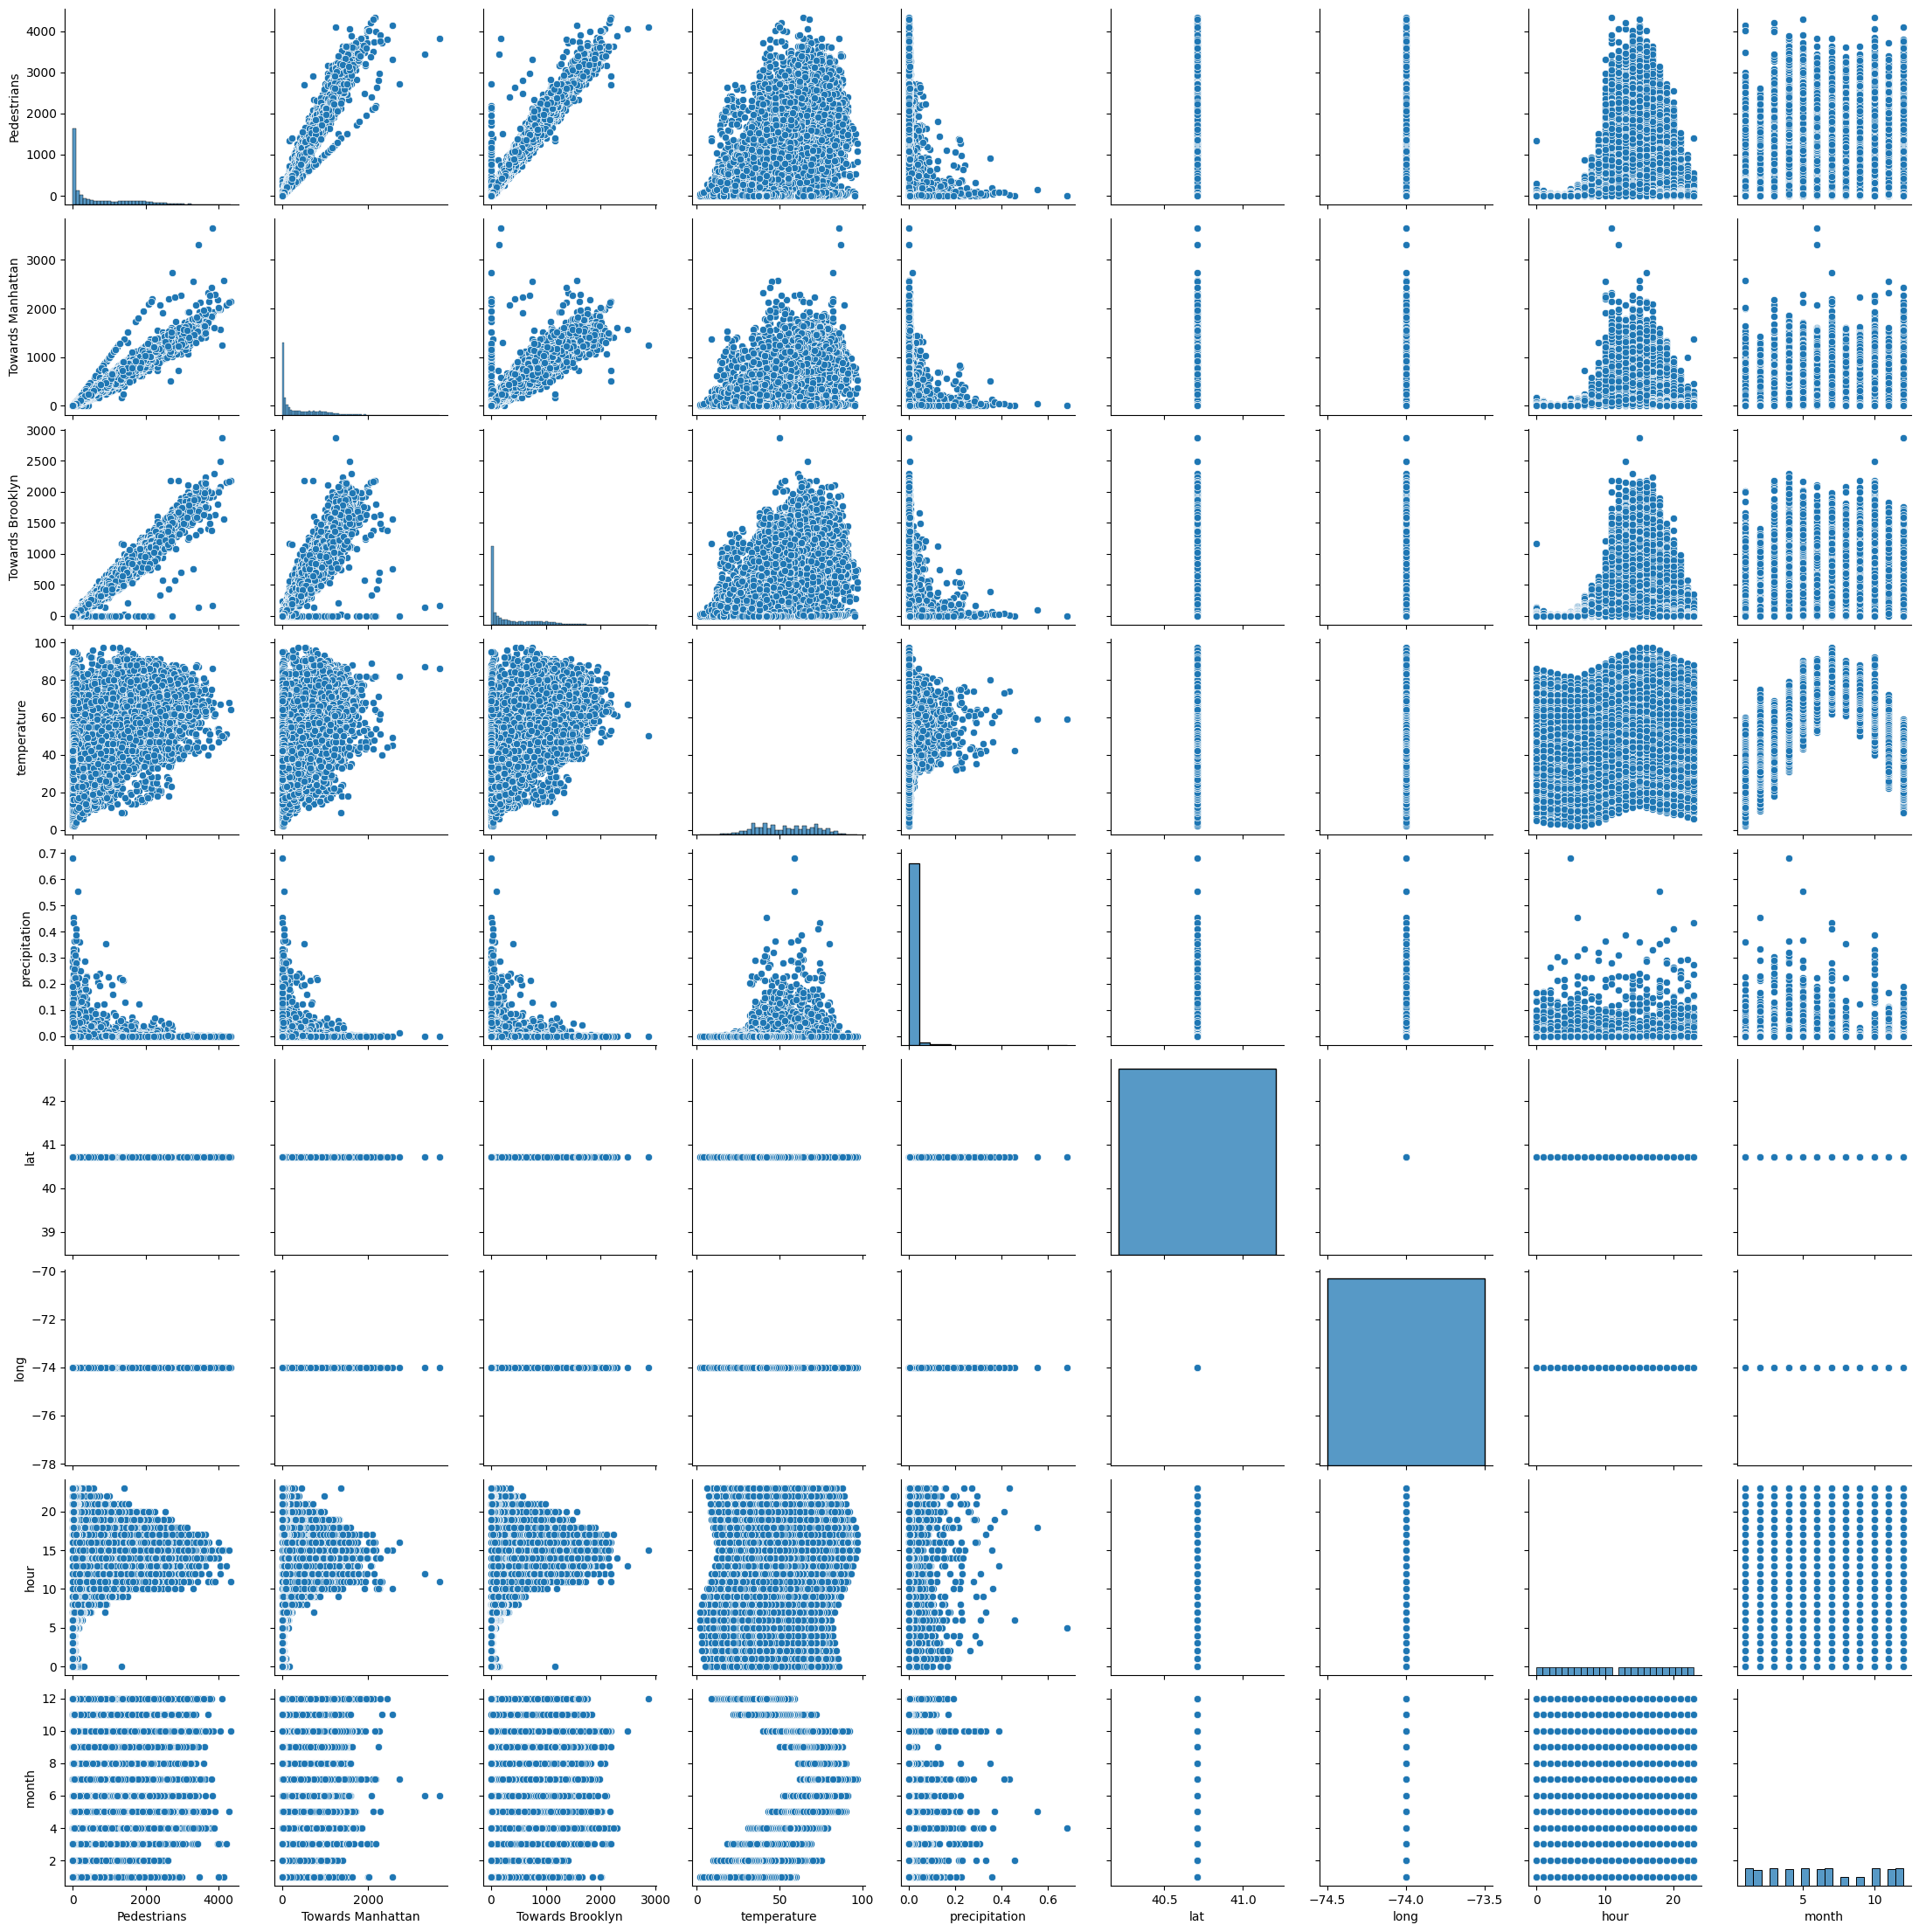

In [ ]:
sns.pairplot(df)

Here, each pane shows one numerical variable on the x-axis and another
numerical variable on the y-axis, so that we can see if a relationship
exists between them. The panes along the diagonal shows the empirical
distribution of values for each feature in this data.

But, it is difficult to see anything useful because there is so much
going on in this plot. We can improve things somewhat by:

-   specifying only the variables we want to include, and exluding
    variables that don’t contain useful information, such as `lat` and
    `long`, and
-   making the points on the plot smaller and partially transparent, to
    help with the overplotting.

We’ll also change the histograms on the diagonal, which show the
frequency of values for each variable, into a density plot which shows
the same information in a more useful format.

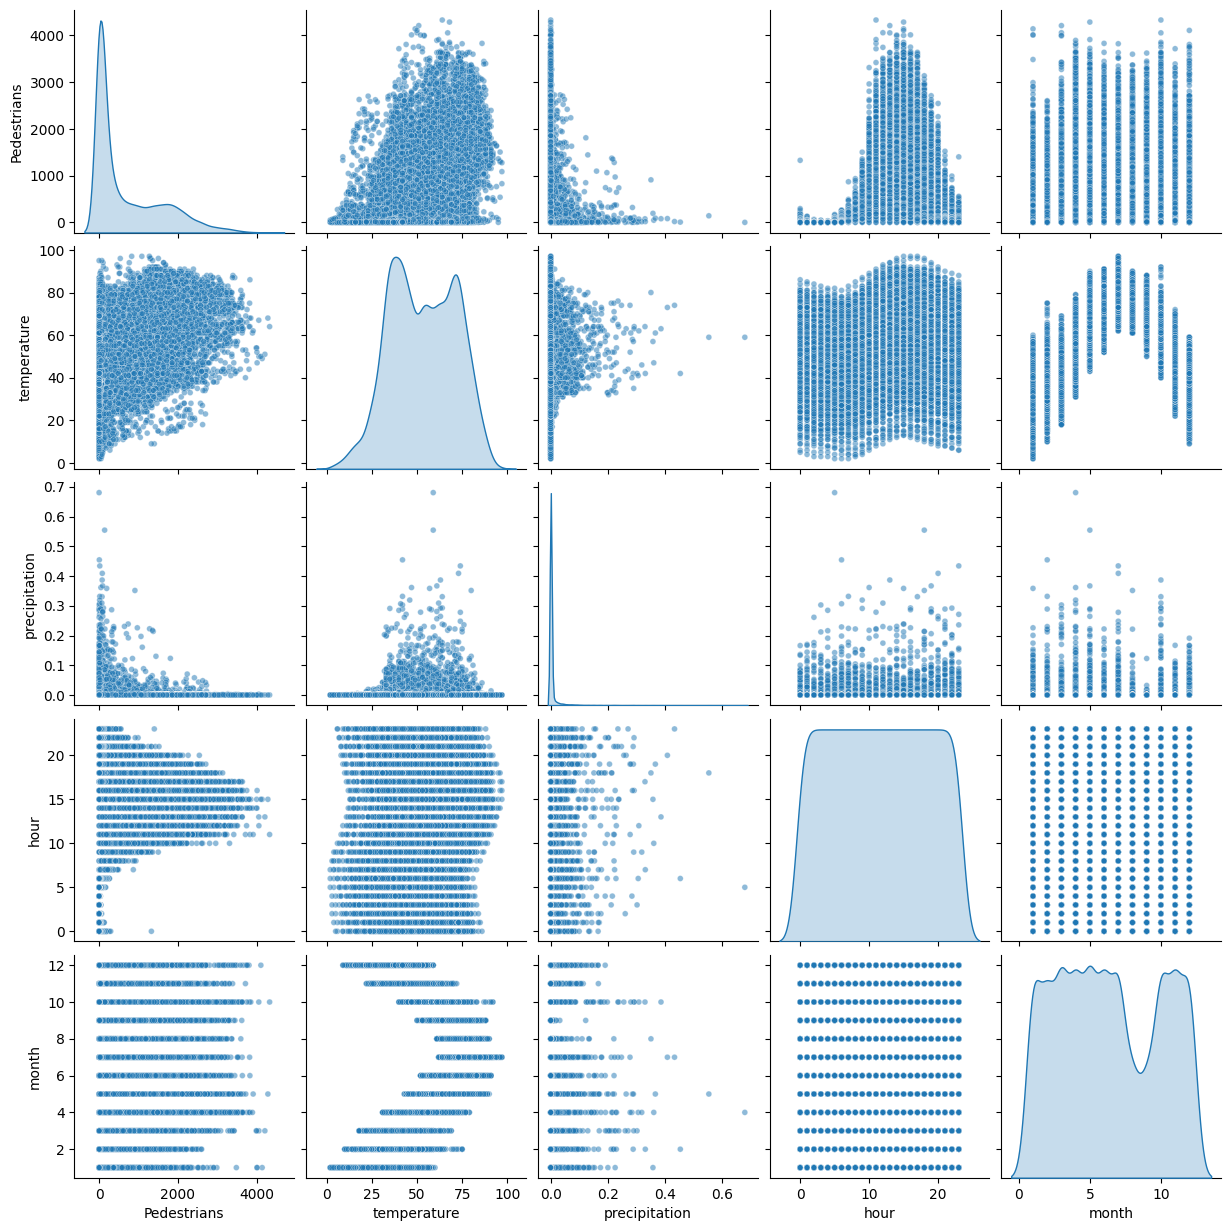

In [ ]:
sns.pairplot(df,
             vars=['Pedestrians', 'temperature', 'precipitation', 'hour', 'month'],
             diag_kind = 'kde',
             plot_kws={'alpha':0.5, 'size': 0.1})

This plot validates the relationship between `temperature` and `hour`,
and between `temperature` and `month`. However, we can also use this
plot to identify useful features - features that appear to be related to
the `target` variable.

### Explore relationships and identify target variable and features

Finally, since our goal is to train a machine learning model, we want to
identify:

-   an appropriate target variable - something on which to train our
    model. (Either a direct target variable, or a proxy.)
-   features that are predictive - if there is any noticeable
    relationship between the target variable and any other variable,
    this is likely to be a useful feature.
-   features that are correlated with one another - if two features are
    highly correlated, this presents some difficulty to certain types of
    models, so we’ll want to know about it.

The `Pedestrians` variable is the obvious target variable for this
learning problem: it’s exactly the quantity we want to predict.

To identify potential predictive features among the numeric variables in
the data, we can use the pairplot. Look at the row of the pairplot in
which `Pedestrians` is on the vertical axis, and each of the other
variables in turn is on the horizontal axis. Which of these seem to show
a relationship? (Note: the relationship does not necessarily need to be
a linear relationship.)

We will also want to evaluate the categorical variables. For example, to
look for a relationship between day of the week and pedestrian volume,
we can group by `day_name`, then call the `describe` function on the
`Pedestrians` column:

In [ ]:
df.groupby('day_name')['Pedestrians'].describe()

,count,mean,std,min,25%,50%,75%,max
day_name,,,,,,,,
Friday,2280.0,696.521053,845.244195,0.0,17.0,243.5,1318.00,3722.0
Monday,2304.0,642.983941,777.944829,0.0,12.0,232.0,1232.00,3657.0
Saturday,2280.0,943.185965,1159.857344,0.0,22.0,241.5,1894.50,4330.0
Sunday,2305.0,753.213015,947.772750,0.0,19.0,206.0,1452.00,3894.0
Thursday,2280.0,601.263158,728.067954,0.0,16.0,214.0,1102.25,3173.0
Tuesday,2328.0,599.210911,731.047235,0.0,14.0,232.5,1122.50,4141.0
Wednesday,2280.0,574.956140,694.807586,0.0,16.0,217.0,1050.00,3807.0


Similarly, we can see the effect of weather:

In [ ]:
df.groupby('weather_summary')['Pedestrians'].describe()

,count,mean,std,min,25%,50%,75%,max
weather_summary,,,,,,,,
clear-day,3127.0,1386.569875,861.890079,0.0,611.50,1401.0,1982.5,4330.0
clear-night,3755.0,102.689214,206.438992,0.0,2.00,19.0,93.5,1779.0
cloudy,2383.0,540.437684,727.986539,0.0,9.00,141.0,944.5,3894.0
fog,76.0,234.473684,307.735795,0.0,15.00,110.0,276.5,1321.0
partly-cloudy-day,3169.0,1422.154307,844.930127,0.0,699.00,1433.0,2008.0,4286.0
partly-cloudy-night,2508.0,93.880383,173.265652,0.0,3.00,23.0,97.0,1522.0
rain,920.0,256.165217,421.571020,0.0,10.00,67.5,311.0,2727.0
sleet,14.0,117.928571,157.850204,0.0,7.25,28.0,254.5,404.0
snow,93.0,195.473118,292.630818,0.0,16.00,77.0,258.0,1561.0


And the effect of various holidays:

In [ ]:
df.groupby('events')['Pedestrians'].describe()

,count,mean,std,min,25%,50%,75%,max
events,,,,,,,,
Black Friday,48.0,723.583333,952.014814,0.0,4.00,172.5,1515.50,2913.0
Christmas Day,48.0,832.312500,1199.381546,0.0,6.00,82.5,1480.75,3807.0
Christmas Eve,48.0,705.520833,945.112444,0.0,10.75,113.0,1406.50,2625.0
Cinco de Mayo,48.0,807.750000,1047.286392,3.0,64.25,408.5,848.25,3390.0
Columbus Day (regional holiday),44.0,694.181818,854.264712,0.0,28.75,332.0,878.75,2587.0
Daylight Saving Time ends,48.0,548.687500,719.950003,0.0,14.75,170.0,983.00,2311.0
Daylight Saving Time starts,48.0,504.500000,708.192515,0.0,10.00,123.5,814.25,2232.0
Easter Monday,24.0,581.916667,704.003515,0.0,15.25,380.5,850.25,2242.0
Easter Sunday,48.0,1321.812500,1443.738832,0.0,55.00,410.5,2809.50,3894.0


Now armed with information about these relationships, we can identify
good candidate features for a machine learning model.